In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
def image_to_data(I, b):
    h, w = I.shape
    b_h = int(h / b)
    b_w = int(w / b)
    
    X = np.zeros((b_h * b_w, b ** 2))
    r = 0
    for i in range(0, h, b):
        for j in range(0, w, b):
            X[r, :] = I[i:i+b, j:j+b].flatten()
            r += 1
    return X

In [3]:
def compress(X, k):
    U, S, V = np.linalg.svd(X)
    Xproj = X @ (V[:k,:].T)
    Sig = np.zeros((k,k))
    for i in range(0, k):
        Sig[i,i] = S[i]
    return U[:,:k] @ Sig @ V[:k,:]

def reduce_k(X, k):
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    Z = (X - mu) / std
    Z_k = compress(Z, k)
    X_k = std * Z_k + mu
    return X_k

In [4]:
def data_to_image(I, X, b):
    h, w = I.shape
    
    I = np.zeros((h, w))
    r = 0
    for i in range(0, h, b):
        for j in range(0, w, b):
            I[i:i+b, j:j+b] = X[r, :].reshape((b, b))
            plt.show()
            r += 1
    return I

In [5]:
def compression_calc(I, k):
    bytes_orig = I.shape[0] * I.shape[1]
    megas_orig = bytes_orig / (1024**2)
    bytes_k = 4 * ((I.shape[0] * k) + k + (k * I.shape[1]))
    megas_k = bytes_k / (1024**2)
    return megas_k / megas_orig

def image_compression(I, b, k):
    start = datetime.now()
    colors = []
    for i in range(3):
        X = image_to_data(I[:, :, i], b)
        X_k = reduce_k(X, k)
        colors.append(data_to_image(I[:, :, i], X_k, b))
    X_k = np.clip(np.stack(colors, axis=-1), 0, 255).round(0).astype(int)
    compression = compression_calc(I, k)
    end = datetime.now() - start
    return X_k, compression, end.total_seconds()

In [6]:
def plot_b_change(I):
    blocks = [5, 10, 20, 25, 50, 100]
    times_5 = np.zeros_like(blocks, dtype='float')
    times_10 = np.zeros_like(blocks, dtype='float')
    compressions_5 = np.zeros_like(blocks, dtype='float')
    compressions_10 = np.zeros_like(blocks, dtype='float')
    for i in range(len(blocks)):
        I_k, compressions_5[i], times_5[i] = image_compression(I, blocks[i], 5)
        I_k, compressions_10[i], times_10[i] = image_compression(I, blocks[i], 10)

    results_b = pd.DataFrame({'b': blocks, 'tiempo k=5': times_5, 'tiempo k=10': times_10,
                              'compresion k=5': compressions_5, 'compression k=10': compressions_10})
    
    plt.plot(blocks, times_5, color='blue')
    plt.plot(blocks, times_10, color='red')
    plt.title("Tiempo de ejecucion")
    plt.show()

    plt.plot(blocks, compressions_5, color='blue')
    plt.plot(blocks, compressions_10, color='red')
    plt.title("Compresion")
    plt.show()
    
    return results_b

In [7]:
def plot_k_change(I):
    components = range(1, 10)
    times_5 = np.zeros_like(components, dtype='float')
    times_20 = np.zeros_like(components, dtype='float')
    compressions_5 = np.zeros_like(components, dtype='float')
    compressions_20 = np.zeros_like(components, dtype='float')
    for i in range(len(components)):
        I_k, compressions_5[i], times_5[i] = image_compression(I, 5, components[i])
        I_k, compressions_20[i], times_20[i] = image_compression(I, 20, components[i])

    results_k = pd.DataFrame({'k': components, 'tiempo b=5': times_5, 'tiempo b=20': times_20,
                              'compresion b=5': compressions_5, 'compression b=20': compressions_20})
    
    plt.plot(components, times_5, color='blue')
    plt.plot(components, times_20, color='red')
    plt.title("Tiempo de ejecucion")
    plt.show()

    plt.plot(components, compressions_5, color='blue')
    plt.plot(components, compressions_20, color='red')
    plt.title("Compresion")
    plt.show()
    
    return results_k

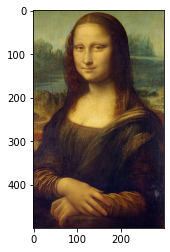

(500, 300, 3)

In [8]:
I1 = plt.imread('Mona Lisa.jpg')[50:550, 50:350, :]
plt.imshow(I1)
plt.show()
I1.shape

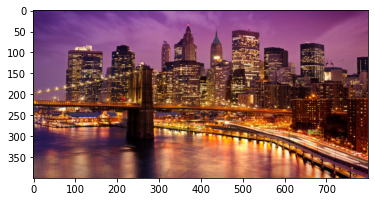

(400, 800, 3)

In [9]:
I2 = plt.imread('Ciudad.jpg')
plt.imshow(I2)
plt.show()
I2.shape

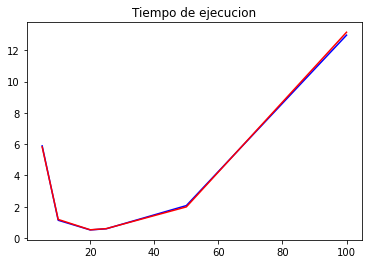

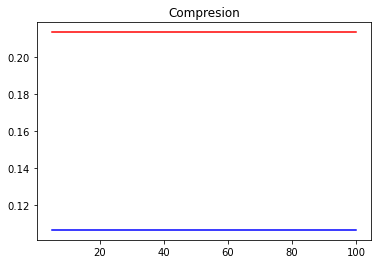

,b,tiempo k=5,tiempo k=10,compresion k=5,compression k=10
0,5,5.889348,5.823718,0.1068,0.2136
1,10,1.131335,1.182097,0.1068,0.2136
2,20,0.512549,0.519454,0.1068,0.2136
3,25,0.585886,0.593747,0.1068,0.2136
4,50,2.068462,1.984835,0.1068,0.2136
5,100,12.972393,13.158480,0.1068,0.2136


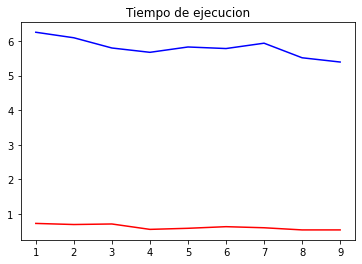

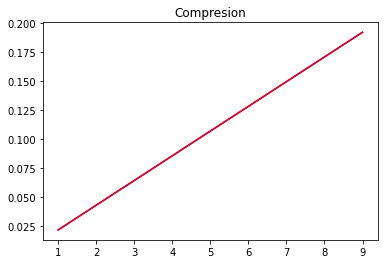

,k,tiempo b=5,tiempo b=20,compresion b=5,compression b=20
0,1,6.255464,0.719262,0.02136,0.02136
1,2,6.095396,0.687507,0.04272,0.04272
2,3,5.799288,0.703123,0.06408,0.06408
3,4,5.673984,0.546874,0.08544,0.08544
4,5,5.828675,0.578159,0.10680,0.10680
5,6,5.783509,0.625003,0.12816,0.12816
6,7,5.938381,0.593745,0.14952,0.14952
7,8,5.516139,0.531247,0.17088,0.17088
8,9,5.392869,0.531281,0.19224,0.19224


In [10]:
results_I1_b = plot_b_change(I1)
display(results_I1_b)
results_I1_k = plot_k_change(I1)
display(results_I1_k)

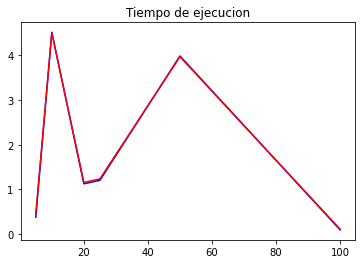

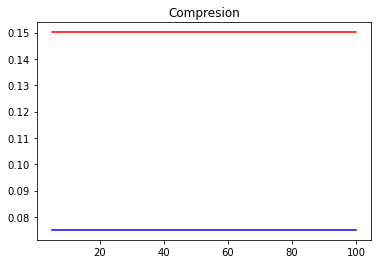

,b,tiempo k=5,tiempo k=10,compresion k=5,compression k=10
0,5,0.377919,0.455122,0.075063,0.150125
1,10,4.516448,4.501298,0.075063,0.150125
2,20,1.125035,1.156660,0.075063,0.150125
3,25,1.203154,1.234340,0.075063,0.150125
4,50,3.984386,3.969214,0.075063,0.150125
5,100,0.093772,0.109334,0.075063,0.150125


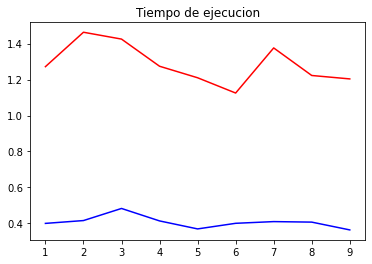

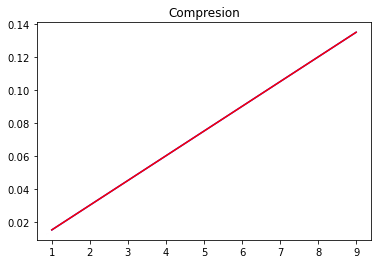

,k,tiempo b=5,tiempo b=20,compresion b=5,compression b=20
0,1,0.400204,1.271653,0.015012,0.015012
1,2,0.415945,1.462978,0.030025,0.030025
2,3,0.483244,1.424910,0.045038,0.045038
3,4,0.413960,1.273918,0.060050,0.060050
4,5,0.369507,1.209913,0.075063,0.075063
5,6,0.400671,1.124993,0.090075,0.090075
6,7,0.410159,1.375772,0.105088,0.105088
7,8,0.407301,1.222569,0.120100,0.120100
8,9,0.363932,1.203516,0.135112,0.135112


In [12]:
results_I2_b = plot_b_change(I2)
display(results_I2_b)
results_I2_k = plot_k_change(I2)
display(results_I2_k)